# Data understanding, preparation and EDA

## Data understanding

#### Import Required lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
%matplotlib inline

#### Read data set

In [2]:
data = pd.read_csv("day.csv")
data.shape

(730, 16)

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Checking the Null values & data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data maipulation
1. Above shape and info shows that there are no missing or null values present and data types are correctly inferred

2. Remove duplicates

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(730, 16)

3. Remove unnecessary columns
   1. instant is same as df index, hence it is not that impactful & can be removed
   2. dteday is datetime based column which is already have month, year, day of week, etc.., hence not required
   3. casual and registered both are diffrent channel counts and dependent variables. Also, "count" is total count variable considered for output variable, hence removing these variable

In [8]:
data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

4. Replace numeric values with real value for categorical variables

In [9]:
data["season"]=data[["season"]].apply(lambda x : x.map({1:"spring",2:"summer",3:"fall",4:"winter"}))["season"]
data["weathersit"]=data[["weathersit"]].apply(lambda x : x.map({1:"clear",2:"misty",3:"light_rain",4:"heavy_rain"}))["weathersit"]
data["mnth"]=data[["mnth"]].apply(lambda x : x.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}))["mnth"]
data["weekday"]=data[["weekday"]].apply(lambda x : x.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"}))["weekday"]
data["yr"]=data[["yr"]].apply(lambda x : x.map({0:"2018",1:"2019"}))["yr"]

5. Rename columns which can help in Visualization plots in labelling and plotting legends

In [10]:
data.rename(columns={"mnth":"month","yr":"year","hum":"humidity","cnt":"count"}, inplace=True)

In [11]:
data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,2018,Jan,0,Sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## EDA

#### Pair plots for continuous numerical variables to check which variables could have linear relation with output variable

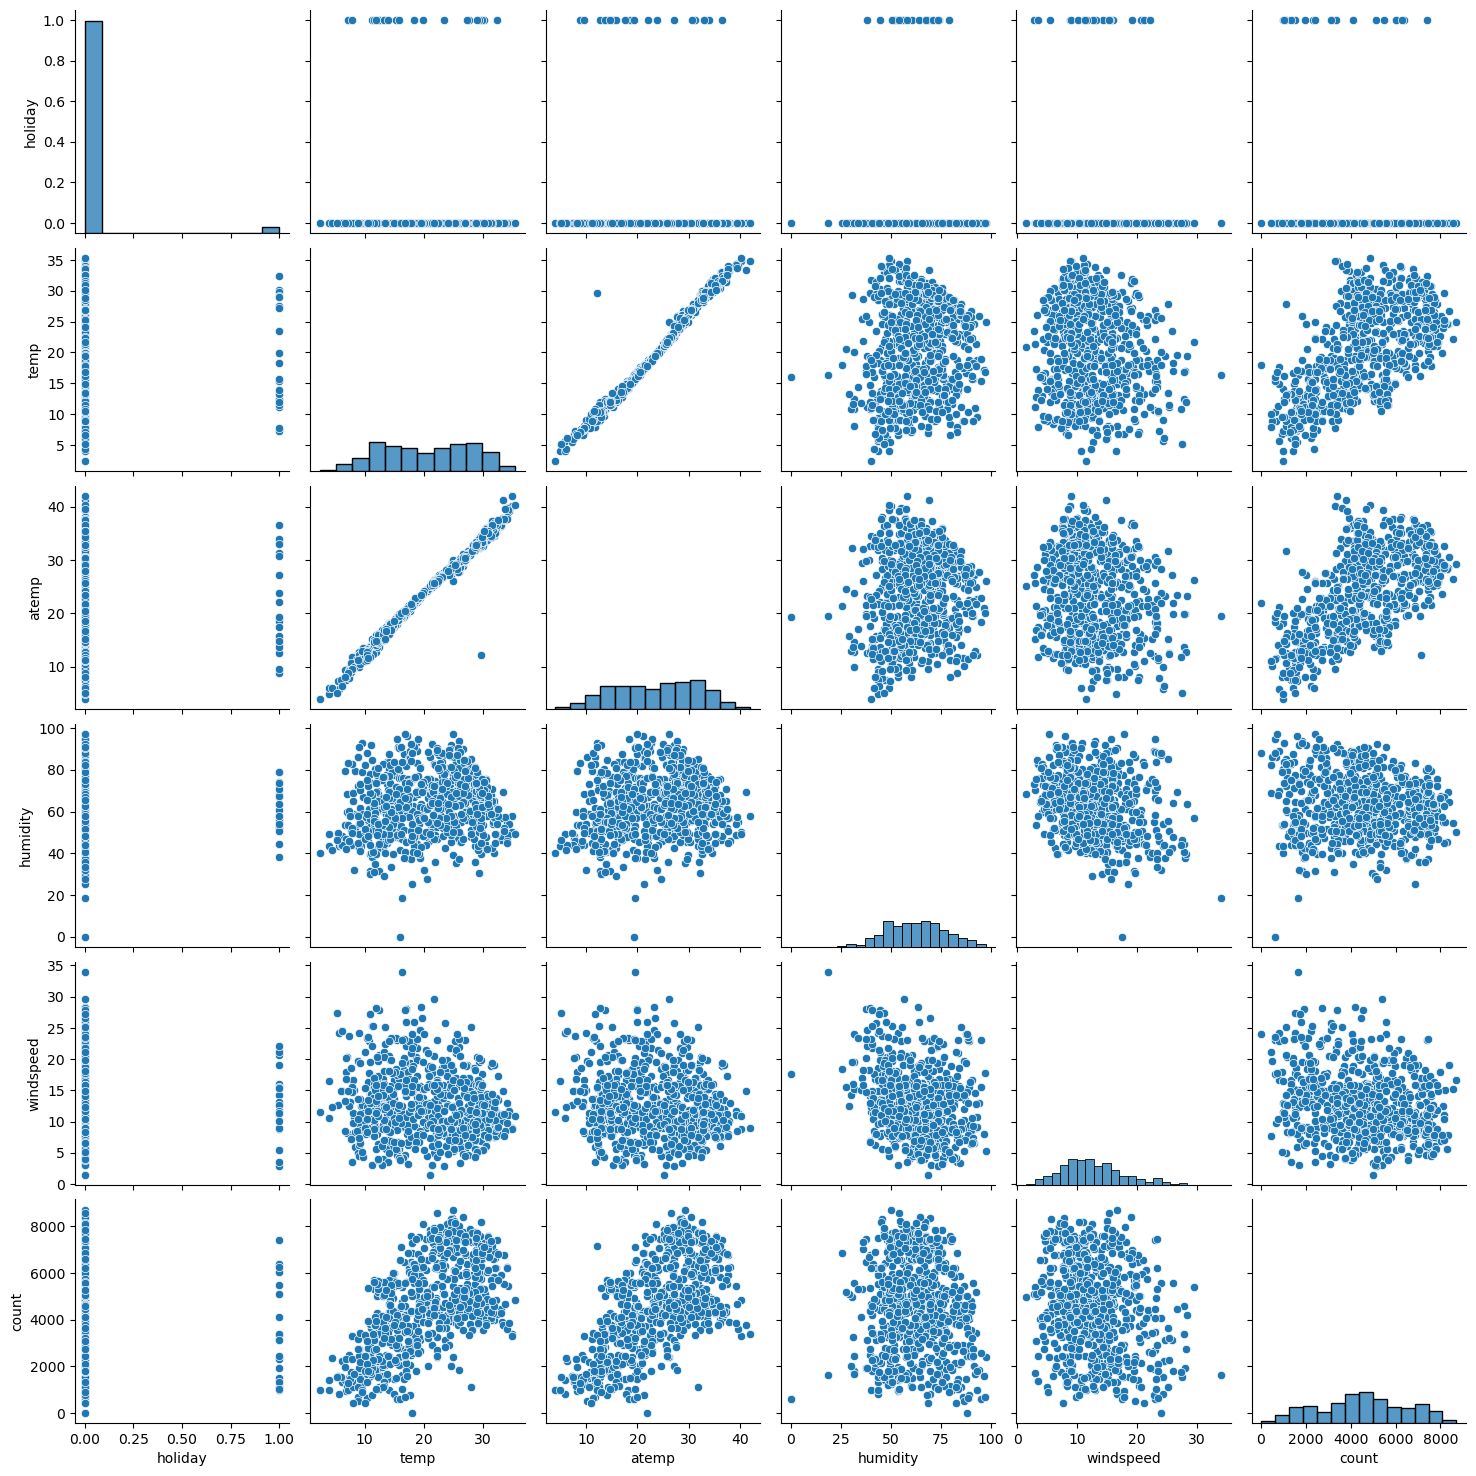

In [12]:
sns.pairplot(data[['holiday','temp', 'atemp', 'humidity', 'windspeed', 'count']])
plt.show()

#### Box plots for categorical variables to check for outliers

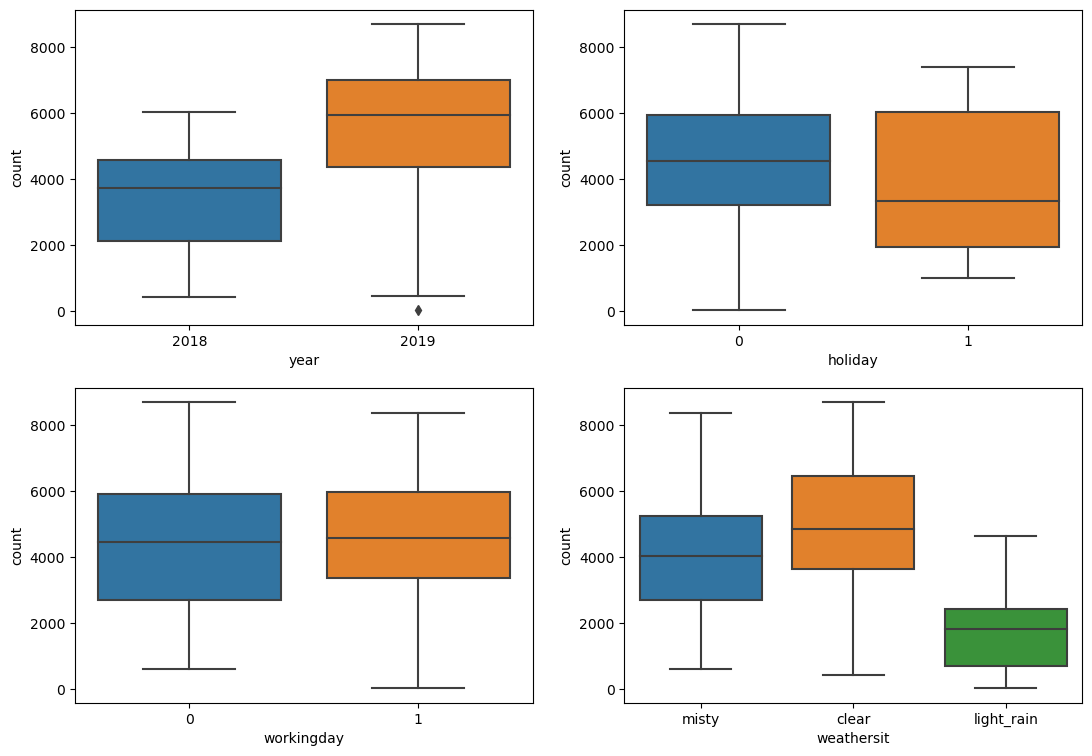

In [13]:
plt.figure(figsize=(13,9))
plt.subplot(2,2,1)
sns.boxplot(x='year', y="count", data=data)
plt.subplot(2,2,2)
sns.boxplot(x='holiday', y="count", data=data)
plt.subplot(2,2,3)
sns.boxplot(x='workingday', y="count", data=data)
plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y="count", data=data)
plt.show()

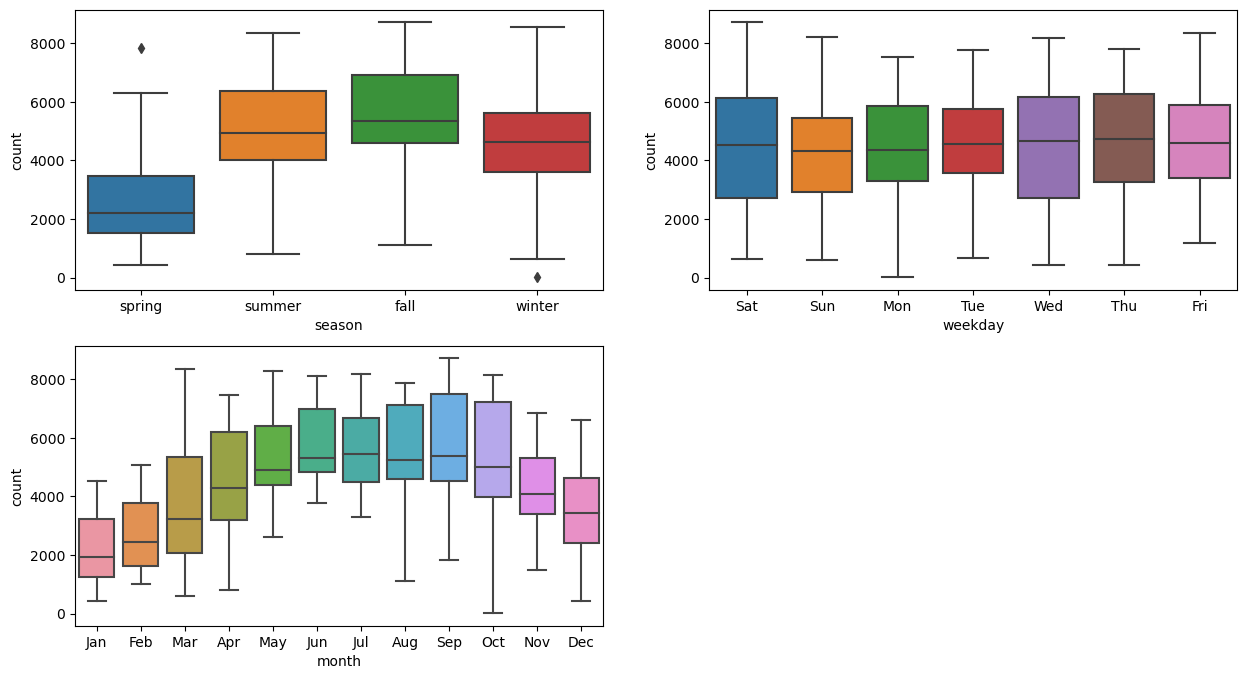

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.boxplot(x='season', y="count", data=data)
plt.subplot(2,2,2)
sns.boxplot(x='weekday', y="count", data=data)
plt.subplot(2,2,3)
sns.boxplot(x='month', y="count", data=data)
plt.show()

#### Distribution plot to perform univariate and bivariate analysis
Creating a Function which we can use multiple times for differnet variables

In [15]:
def category_bivariate_barplot(feature):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.barplot(x=feature, y="count", data=data)
    plt.subplot(1,2,2)
    sns.barplot(x=feature, y="count", data=data, hue="year")
    plt.show()

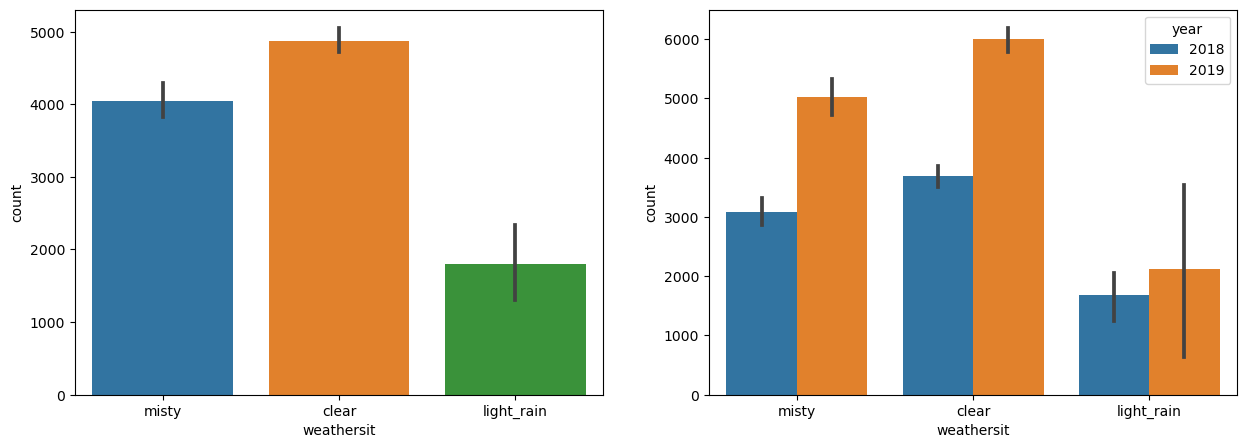

In [16]:
category_bivariate_barplot("weathersit")

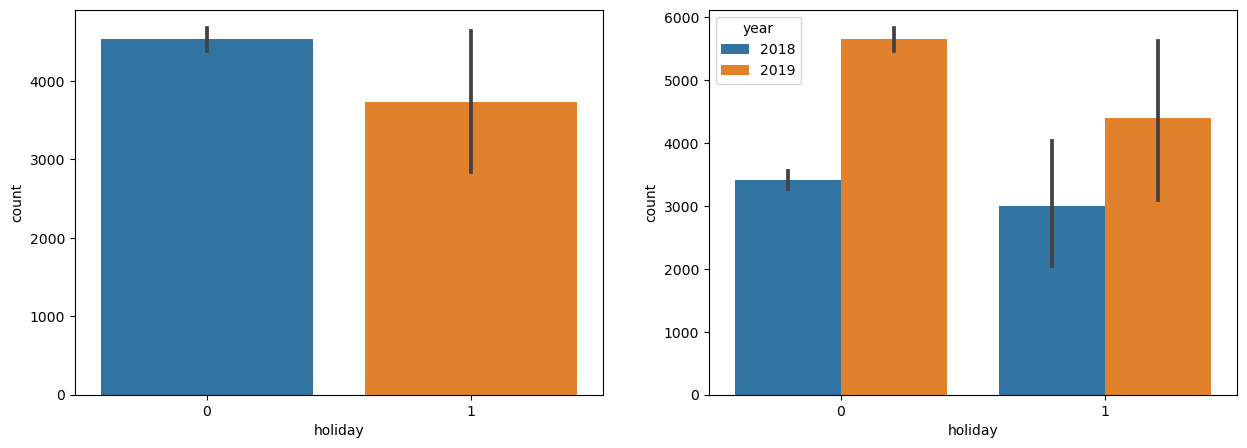

In [17]:
category_bivariate_barplot("holiday")

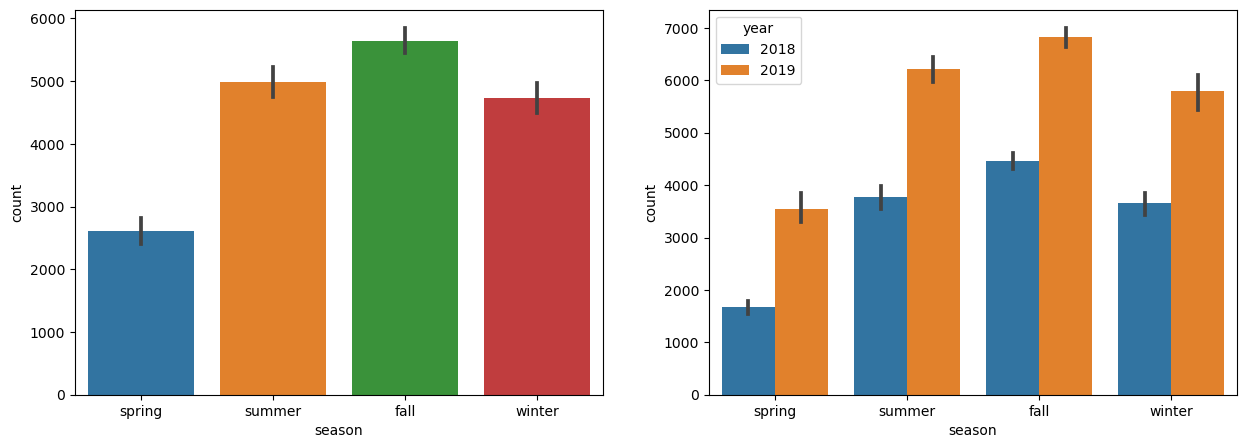

In [18]:
category_bivariate_barplot("season")

### EDA Summary
- Clear weather having highest while light rain having lowest bike rentals
- In case of holiday, bike rentals is lower than non holiday. Possible that people might prefer spending time with family or 
  choosing other options for outings.
- 'temp', 'atemp' looks like having linear relationship with output variable count from pairplots
- 2019 year have higher number of bike rentals than 2018 and for every other combined category
- Fall having highest count while spring having lowest bike rentals
- September month having highest count while January having lowest bike rentals
- Day of week doesn't seem to have any effect on bike rentals

## Data preparation

#### Handle categorial variables and dummy variable creation
1. Update categorical variable year with values as 0 if 2018, else 1 if 2019
2. Create dummy variables for season, weathersit, month, weekday categorical variable and drop first column as other dummy variables could explain first variable value

In [19]:
data["year"]=data[["year"]].apply(lambda x : x.map({"2018":0,"2019":1}))["year"]

In [20]:
season_dummy=pd.get_dummies(data.season, drop_first=True)
season_dummy = season_dummy.apply(lambda x: x.map({True:1,False:0}))
df_norm=pd.concat([data, season_dummy], axis=1)
df_norm.drop("season", axis=1, inplace=True)

In [21]:
weathersit_dummy=pd.get_dummies(df_norm.weathersit, drop_first=True)
weathersit_dummy = weathersit_dummy.apply(lambda x: x.map({True:1,False:0}))
df_norm=pd.concat([df_norm, weathersit_dummy], axis=1)
df_norm.drop("weathersit", axis=1, inplace=True)

In [22]:
month_dummy=pd.get_dummies(df_norm.month, drop_first=True)
month_dummy = month_dummy.apply(lambda x: x.map({True:1,False:0}))
df_norm=pd.concat([df_norm, month_dummy], axis=1)
df_norm.drop("month", axis=1, inplace=True)

In [23]:
weekday_dummy=pd.get_dummies(df_norm.weekday, drop_first=True)
weekday_dummy = weekday_dummy.apply(lambda x: x.map({True:1,False:0}))
df_norm=pd.concat([df_norm, weekday_dummy], axis=1)
df_norm.drop("weekday", axis=1, inplace=True)

In [24]:
df_norm.info()
df_norm.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   spring      730 non-null    int64  
 9   summer      730 non-null    int64  
 10  winter      730 non-null    int64  
 11  light_rain  730 non-null    int64  
 12  misty       730 non-null    int64  
 13  Aug         730 non-null    int64  
 14  Dec         730 non-null    int64  
 15  Feb         730 non-null    int64  
 16  Jan         730 non-null    int64  
 17  Jul         730 non-null    int64  
 18  Jun         730 non-null    int64  
 19  Mar         730 non-null    i

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df_norm.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


# Model building and Evaluation

### Approach on building linear regression model
1. Split data in training and test data set
2. Apply scaler so that it becomes easy to interpret data and all variations could be defined in standard known range
3. Create linear regression and Fit independent and dependent variable in it
4. Use RFE (recursive feature elimination) to remove features based on coefficient which are not significantly enough. Selecting 13 top features out of 29 features as there are 11 dummy dummy features for month category and 6 dummy features for week day category and both month and weekday (total 17 variables) doesnt show much significant impact on output variable except for few cases.
5. In terms of business, bike renting can be affected by weather conditions, season and holiday or not. Also temperature shows highest positive correlation with output variable count. Hence it can't be removed.
6. Out of 13, check significnce level of each feature based on p value limiting to 0.05 (5%)
7. Check multicollinearity exists or not by calculating variance inflation factor (VIF)
8. Any VIF higher than 10 should be removed as that means other features are abe to explain that particular variable
9. Check if assumptions hold true on trained model
10. Predict output variables on test data and check if assumptions hold true on test data
11. Compare R2, Adj R2, Probability of F-statistic useful params to see if model built is good or overfit

## Model building

#### Split input data set in training and testing dataset

In [26]:
df_train, df_test = train_test_split(df_norm, train_size=0.7, test_size = 0.3, random_state=100)

In [27]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


#### Scale continuous variables so that values can fit on same scale
We are performing multiple linear regression where values of independent variables varies a lot which can impact the model and slope for each feature. If we make each feature fit on same scale, then it would become easy to interpret the data and even help in fitting the regressin model as well.
<p> We will use MinMaxScaler which will fit data between 0 to 1

In [28]:
scaler = MinMaxScaler()
scaler_vars=['temp', 'atemp', 'humidity', 'windspeed', 'count']
df_train[scaler_vars]=scaler.fit_transform(df_train[scaler_vars])

In [29]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,spring,summer,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Plot correlation between all available features
This is to identify strong and weak correlation between features and output variables

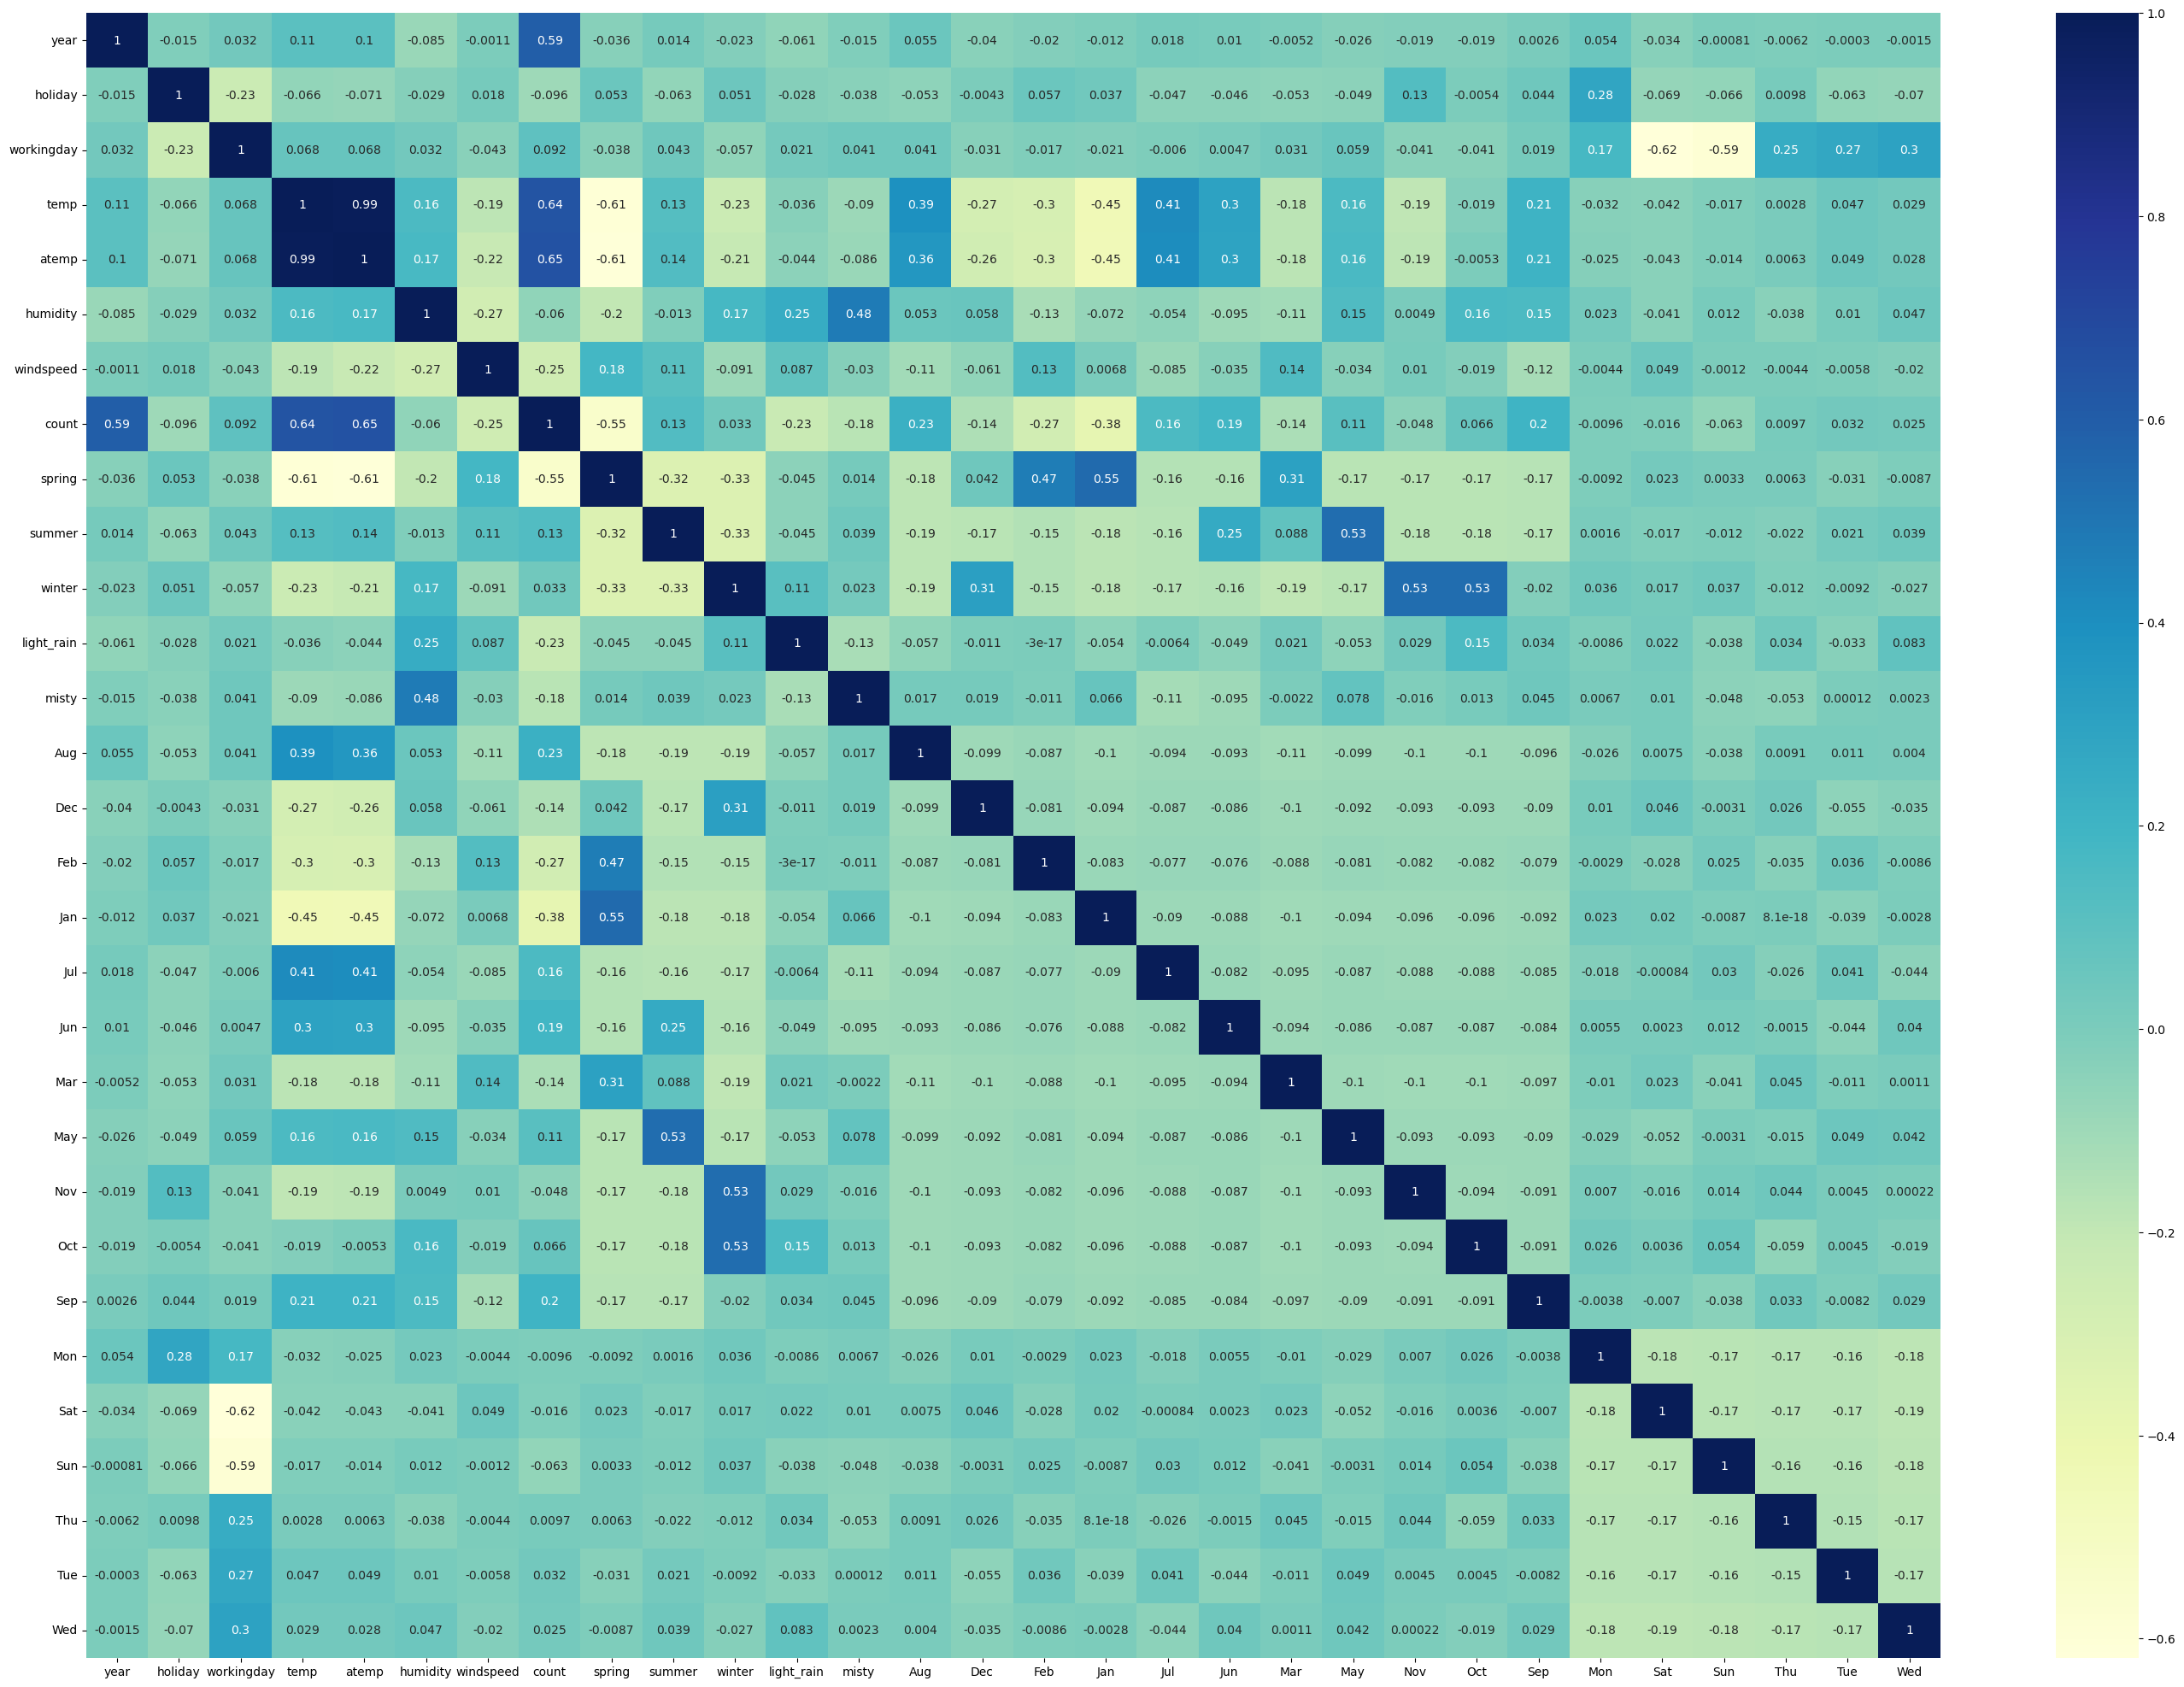

In [30]:
plt.figure(figsize=(35,25))
sns.heatmap(df_train.corr(), cmap="YlGnBu",annot=True)
plt.show()

##### Create independent and dependent variable data set

In [31]:
y_train_real = df_train.pop('count')
X_train = df_train

#### Create and Fit linear regression

In [32]:
lnr=LinearRegression()
lnr.fit(X=X_train, y=y_train_real)

LinearRegression()

#### Create and Fit in recursive feature elimination model for automatic feature selection

In [33]:
#Select 13 features as initialfeature list which could hold significant level in model building
rfe_model=RFE(lnr, n_features_to_select=13)
rfe_model=rfe_model.fit(X=X_train, y=y_train_real)

##### Check which features are eliminated or selected and ranking

In [34]:
list(zip(X_train.columns, rfe_model.support_, rfe_model.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('misty', True, 1),
 ('Aug', False, 9),
 ('Dec', False, 5),
 ('Feb', False, 6),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('Jun', False, 16),
 ('Mar', False, 17),
 ('May', False, 8),
 ('Nov', False, 4),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 11),
 ('Sat', True, 1),
 ('Sun', False, 10),
 ('Thu', False, 14),
 ('Tue', False, 12),
 ('Wed', False, 15)]

In [35]:
# Columns which are selected from RFE model
rfe_col=X_train.columns[rfe_model.support_]
rfe_col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'light_rain', 'misty', 'Jul', 'Sep', 'Sat'],
      dtype='object')

In [36]:
# Data set filterd with trained columns
X_train_rfe=X_train[rfe_col]
X_train_rfe=sm.add_constant(X_train_rfe)

#### Check multicollinearity and manual feature selection

In [37]:
# Create function which will fit the model and calculate VIF per feature as well
def sm_ols_fit(y, X):
    sm_model=sm.OLS(y, X).fit()
    print(sm_model.summary())
    print("------------------")
    print("------------------")
    print("Calculate VIF")
    print("------------------")
    print("")
    X_vif=X.drop("const", axis=1)
    df_vif=pd.DataFrame()
    df_vif["Features"]=X_vif.columns
    df_vif["VIF"]=[variance_inflation_factor(X_vif, i) for i in range(X_vif.columns.size)]
    print(df_vif)
    print("")
    print("")
    return sm_model

In [38]:
# Based on RFE given features, build linear regression model from statsmodels
sm_model=sm_ols_fit(y_train_real, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          7.51e-190
Time:                        19:10:24   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     496   BIC:                            -934.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2796      0.035      8.096      0.0

In [39]:
# "Sat" p-value is higher than 0.05 (5%), hence it doesn't look significant.
# Removing won't impact model much. Remove the feature and again build the model
X_train_rfe.drop("Sat", axis=1, inplace=True)
sm_model=sm_ols_fit(y_train_real, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.69e-190
Time:                        19:10:24   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.0

##### p-value of all features much lesser than 0.05 (5%), hence removing features based on VIF scores now. VIF score of humidity is much higher than 10, hence good candidate to remove. High Vif score means, multicollieanrity exists and highly correlated with other independent variables

In [40]:
X_train_rfe.drop("humidity", axis=1, inplace=True)
sm_model=sm_ols_fit(y_train_real, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.40e-187
Time:                        19:10:24   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1996      0.030      6.758      0.0

##### From EDA analysis, we dont see July holding any significant place in terms of positive or negative correlation with output variable, where p value is highest amongst others. We should be able to remove July month from feature list

In [41]:
X_train_rfe.drop("Jul", axis=1, inplace=True)
sm_model=sm_ols_fit(y_train_real, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          7.36e-187
Time:                        19:10:24   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1910      0.030      6.456      0.0

##### We can see that model is not impacted much after removing July based on Adjusted R2 and Probability of F-statistic
##### All p-values are below 0.05 (5%) and VIF scores are also below 5.
##### VIF for temp is slightly higher than 5, but temperature is required data points for business. Also, removing temperature reduces R2 score drastically, hence we should not remove temp feature

In [42]:
# Selected features list is given below
sm_model.params

const         0.190994
year          0.234060
holiday      -0.096865
temp          0.478177
windspeed    -0.148155
spring       -0.055092
summer        0.060987
winter        0.095929
light_rain   -0.286002
misty        -0.080124
Sep           0.090932
dtype: float64

#### Equation for predicting output variable count

count = 0.2 + 0.233 * year - 0.098 * holiday + 0.491 * temp - 0.148 * windspeed - 0.067 * spring season + 0.045 * summer season
+ 0.083 * winter season - 0.285 * light_rain weathersit - 0.082 * misty weathersit + 0.077 * Sep month

This shows which features can affect bike renting positively or negatively significantly

#### R2 and Adj R2 values of trained model

In [43]:
print(sm_model.rsquared)
print(sm_model.rsquared_adj)

0.833170119099662
0.8298268349132825


## Model Building Assumptions

#### Error term distribution and mean of training data

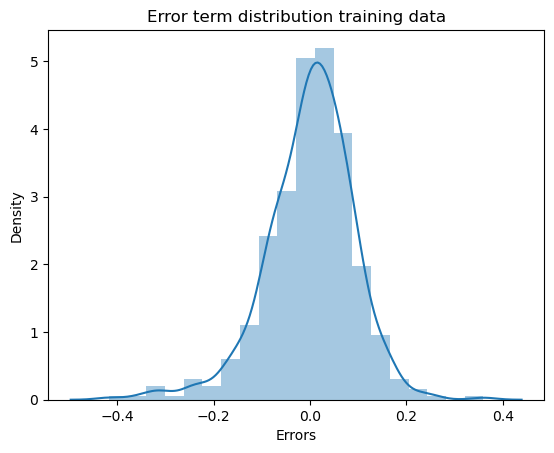

In [44]:
y_train_pred=sm_model.predict(X_train_rfe)
X_train_rfe.drop("const", axis=1, inplace=True)
sns.distplot((y_train_real-y_train_pred), bins=20)
plt.xlabel("Errors")
plt.title("Error term distribution training data")
plt.show()

#### Pattern in error terms against output variable

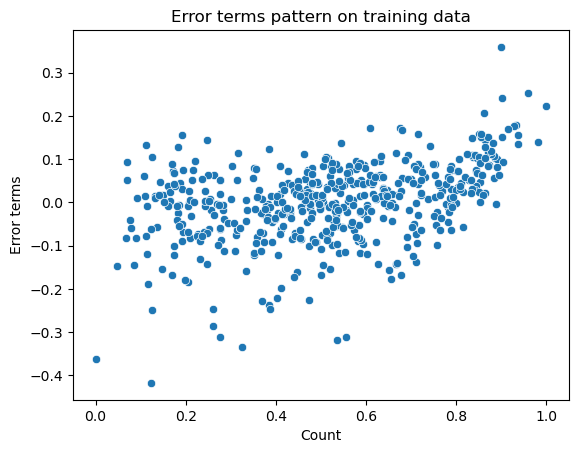

In [45]:
sns.scatterplot(x=y_train_real, y=(y_train_real-y_train_pred))
plt.xlabel('Count')
plt.ylabel('Error terms')
plt.title("Error terms pattern on training data")
plt.show()

#### Homoscedacity check with individual continuous numerical feature

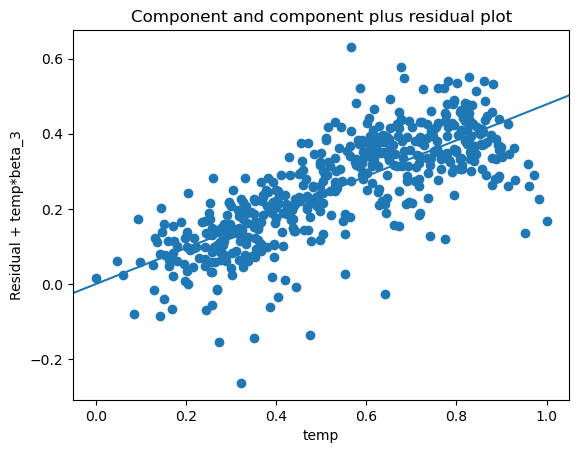

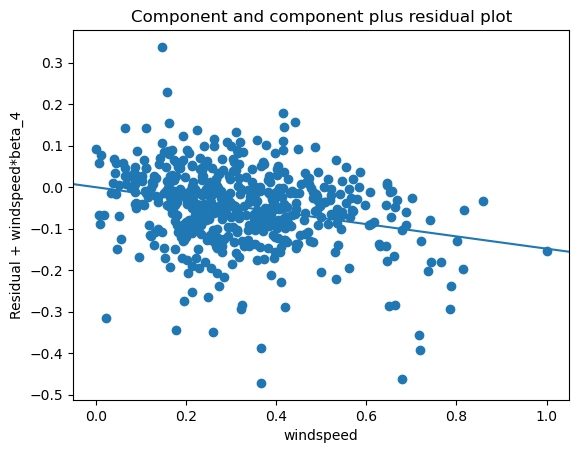

In [46]:
sm.graphics.plot_ccpr(sm_model, 'temp')
plt.show()
sm.graphics.plot_ccpr(sm_model, 'windspeed')
plt.show()

## Model Prediction

#### Prepare for test data set and predict output
1. Perform same scaling operation on test data as done on training data
2. Add constant to consider intercept calculation
3. predict output for given test

In [47]:
df_test[scaler_vars]=scaler.transform(df_test[scaler_vars])
y_test_real=df_test.pop("count")
X_test=df_test[X_train_rfe.columns]
X_test_sm=sm.add_constant(X_test)
y_test_pred=sm_model.predict(X_test_sm)

#### Error term distribution of test data

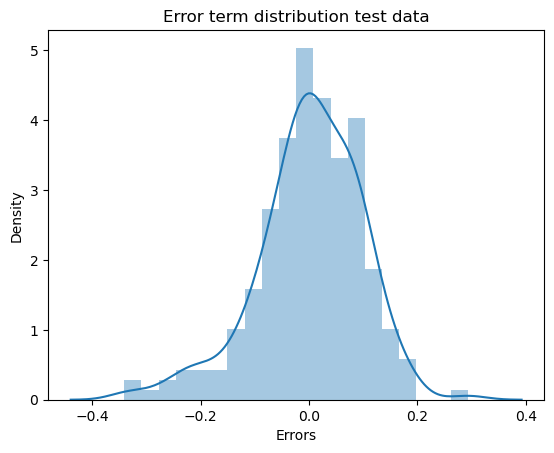

In [48]:
sns.distplot((y_test_real-y_test_pred), bins=20)
plt.xlabel("Errors")
plt.title("Error term distribution test data")
plt.show()

#### Check relationship of output variable and error terms on test data

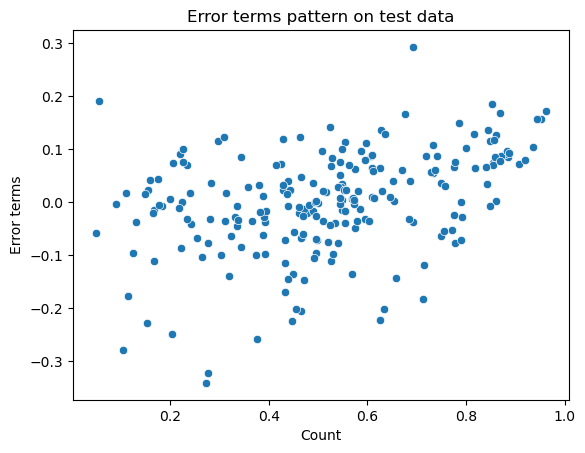

In [49]:
sns.scatterplot(x=y_test_real, y=(y_test_real-y_test_pred))
plt.xlabel('Count')
plt.ylabel('Error terms')
plt.title("Error terms pattern on test data")
plt.show()

#### R2 and Adj R2 score on test data

In [50]:
r2_test_score = r2_score(y_test_real,y_test_pred)
print(r2_test_score)

0.8035441330582013


In [51]:
r2_adj_test_score = (1 - ((1-r2_test_score) * (X_test_sm.shape[0] - 1) / (X_test_sm.shape[0] - 1 - sm_model.params.size)))
print(r2_adj_test_score)

0.7931044493076709


# Model Evaluation summary
- Train data set R2          : 0.83
- Train data set Adjusted R2 : 0.83 
- Test data set R2           : 0.80
- Test data set Adjusted R2  : 0.79
- R2 and Adjusted R2 scores more than 0.8, hence 80% variance can be explained by the model, which is pretty good
- On test data, R2 and Adj R2 is ~0.8 which is very close to actual model, which explains that model is not over fit.
- Prob (F-statistic) is very low, which shows that overall significance level of model is high
- Error term mean is 0 on both training and test data
- Error term is having normal distribution on both training and test data
- Error terms are independent of each other from the pattern on both training and test data
- Homoscedacity is checked against temperature and windspeed continuous variables. Variance of error terms doesn’t seem to be changing with change in predictor variable
- In final model, we were able to select 10 features which is not very high and not so complex as seen by Adjusted R2 score. Removed high p value features and high VIF score features one by one. Hence multicollinearity doesn't exist in last model
- All p values of features are less than 0.05 (5%), hence individual features are also significant. Feature like "Sat" day of the week is removed based on p-value.
- VIF score is less than 5, hence multicollinearity doesn't exist in final model
- Bike renting equation can be created like
  - count = 0.2 + 0.233 * year - 0.098 * holiday + 0.491 * temp - 0.148 * windspeed - 0.067 * spring season + 0.045 * summer season + 0.083 * winter season - 0.285 * light_rain weathersit - 0.082 * misty weathersit + 0.077 * Sep month
  - Which means temperature, year, (light rain, misty) weather conditions, (spring, summer, winter) season, wind speed, holiday and Sep month can impact bike renting significantly. Some features are impacting output positively while some impacting negatively.
  - Year shows that bike renting has increased YoY basis.
  - Temperature is the most impacting feature for bike renting.